## data

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df_youtube_playlist = pd.read_csv("youtube_scaping_playlist.csv")
df_youtube_scrolling = pd.read_csv("youtube_scaping_scrolling.csv")

In [3]:
df_youtube_comments = pd.concat([df_youtube_playlist, df_youtube_scrolling], ignore_index=True)
df_youtube_comments = df_youtube_comments.dropna()

In [4]:
df_youtube_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34456 entries, 0 to 34963
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        34456 non-null  object
 1   title      34456 non-null  object
 2   date       34456 non-null  object
 3   views      34456 non-null  object
 4   recommend  34456 non-null  object
 5   contents   34456 non-null  object
 6   reply      34456 non-null  object
dtypes: object(7)
memory usage: 2.1+ MB


In [5]:
df_youtube_comments.isnull().sum()

_id          0
title        0
date         0
views        0
recommend    0
contents     0
reply        0
dtype: int64

In [6]:
df_youtube_comments['date'] = df_youtube_comments['date'].str.replace("최초 공개: ", '', regex=True)
df_youtube_comments['date'] = pd.to_datetime(df_youtube_comments['date'], format='%Y. %m. %d.')
df_youtube_comments['date_year'] = df_youtube_comments['date'].dt.year
df_youtube_comments['date_month'] = df_youtube_comments['date'].dt.month

In [7]:
df_youtube_comments

,_id,title,date,views,recommend,contents,reply,date_year,date_month
0,6631d19b119b5f09bb9288e4,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,+해당 영상에 대한 수익금의 일부를 대한민국 의료진에게 기부하였습니다.\n\n점점 ...,2020,4
1,6631d19b119b5f09bb9288e5,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,가족이라 껴안고도싶고 하겠지만 메뉴얼대로 공항에서부터 철저하게 격리절차 밟는과정은 ...,2020,4
2,6631d19b119b5f09bb9288e6,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,평소에 조카한테 얼마나 잘해줫으면 저렇게 삼촌을 좋아하냐 ㅎㅎ 참 좋은사람이라는게...,2020,4
3,6631d19c119b5f09bb9288e7,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,와 눈물나... 2:20 나를 누구보다 아끼고 잘되길 바라는 우리의 부모님들.. 아...,2020,4
4,6631d19c119b5f09bb9288e8,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,부모님이 세계여행 응원해주시고 믿어주신거 대단하시네요. 플랜카드까지 달아놓아주신거랑...,2020,4
...,...,...,...,...,...,...,...,...,...
34959,6631cc977547545ba205e82c,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,붉은 메일이 있다는건 첨 알았네요. 해외 여행하시는 분들 국내는 다 가보고 해외여행...,2021,10
34960,6631cc977547545ba205e82d,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,영월에 선돌.한반도지형은\n가봤는데 붉은메밀꽃밭\n가보려는데 카카오네비에\n주소 쳐...,2021,10
34961,6631cc977547545ba205e82e,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,영월 ...강추 여행지!!!!!!\n감히 한마디 하자면 ㅋㅋㅋㅋ \n청령포 추가요,2021,10
34962,6631cc977547545ba205e82f,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여행,2021-10-09,"조회수 18,336회",285,국내여행지 가을 영월 가볼만한곳 BEST 4 붉은 메밀 꽃이 피었습니다 강원도 여...,붉은 메밀은 어디가야 볼 수 있을까요? 주소가 궁금합니다,2021,10


## 제목이 유사한 것들끼리 -> 댓글 topic분석

### title

In [8]:
!pip install python-mecab-ko

In [9]:
from mecab import MeCab
mecab = MeCab()

In [10]:
mecab.pos(df_youtube_comments['title'][13548])

[('🌿', 'SY'),
 ('나', 'NP'),
 ('홀로', 'MAG'),
 ('대전', 'NNP'),
 ('에서', 'JKB'),
 ('힐링', 'NNG'),
 ('하', 'XSV'),
 ('기', 'ETN'),
 ('ㅣ', 'NNG'),
 ('대전', 'NNG'),
 ('일상', 'NNG'),
 ('브이', 'NNG'),
 ('로', 'JKB'),
 ('그', 'MM'),
 ('ㅣ', 'NNG'),
 ('대전', 'NNP'),
 ('한옥', 'NNG'),
 ('투어', 'NNG')]

In [11]:
def mecab_tag(text):
    morphs_nouns = []
    morphs_nouns_list = []
    for sentence in text:
        # 명사
        morphs = [morph for morph, tag in mecab.pos(sentence) if tag in ['NNG', 'NNP']]
        morphs_nouns.append(' '.join(morphs))
    
    return morphs_nouns

In [12]:
morphs_nouns = mecab_tag(df_youtube_comments['title'])

In [13]:
df_youtube_comments['title_noun'] = morphs_nouns

In [14]:
pattern = '여행지|여행|브이로그|브이|로그|국내|한국|대한민국|ㅣ|추천'
df_youtube_comments['title_noun'] = df_youtube_comments['title_noun'].str.replace(pattern, '', regex=True)

In [15]:
df_youtube_comments['title_noun']

0                 골방 신세 자 격리
1                 골방 신세 자 격리
2                 골방 신세 자 격리
3                 골방 신세 자 격리
4                 골방 신세 자 격리
                ...         
34959      가을 영월 곳 메밀 꽃 강원도 
34960      가을 영월 곳 메밀 꽃 강원도 
34961      가을 영월 곳 메밀 꽃 강원도 
34962      가을 영월 곳 메밀 꽃 강원도 
34963      가을 영월 곳 메밀 꽃 강원도 
Name: title_noun, Length: 34456, dtype: object

- 중복 제거 후에 해야될 거 같음 -> 중복 많을 수록 topic에 영향 줄듯

In [16]:
df_youtube_comments_unique = df_youtube_comments.drop_duplicates(subset=['title_noun'])

In [17]:
df_youtube_comments_unique

,_id,title,date,views,recommend,contents,reply,date_year,date_month,title_noun
0,6631d19b119b5f09bb9288e4,"🇰🇷 459일 만에 한국에 왔는데, 골방 신세로 보낸 2주일😷 [자가격리 vlog]",2020-04-11,"조회수 2,696,715회",2.8만,#자가격리브이로그 #여행가jay\n---------------------------...,+해당 영상에 대한 수익금의 일부를 대한민국 의료진에게 기부하였습니다.\n\n점점 ...,2020,4,골방 신세 자 격리
200,6631d1ba119b5f09bb9289ac,"🇰🇷 한적한 섬마을에서 생활해보기 (with 쏘이, 곽튜브, 이나랜드) in 거제도",2020-06-26,"조회수 149,739회",2.2천,#곽튜브 #쏘이 #이나랜드 #여행가jay #여행유튜버 #거제도 \n---------...,가슴이 따뜻해지네 방구와 함께,2020,6,섬 마을 생활 곽 튜브 랜드 거제
360,6631d1d6119b5f09bb928a4c,"🇰🇷10만 기념, 무계획으로 대책 없이 떠난 10일간의 제주 일기",2020-10-08,"조회수 189,800회",3.9천,#제주브이로그 #여행가 제이\n\n올해 안에 10만을 달성하는 게 목표였는데\n생각...,스킵 한 번도 안하고 다보고 왔습니다 :) 자주 보자 동생들ㅎ,2020,10,기념 계획 대책 제주 일기
560,6631d1f5119b5f09bb928b14,🇰🇷 충동적으로 떠나버린 대한민국 섬 여행 EP.0,2020-10-31,"조회수 42,027회",1천,"사실 다음 해외 영상이 프랑스 파리편인데,\n현재 프랑스의 상황이 좋지 않아서 파리...","사실 다음 해외 영상이 프랑스 파리편인데,\n현재 프랑스의 상황이 좋지 않아서 파리...",2020,10,충동 섬
660,6631d20d119b5f09bb928b78,🇰🇷 계획한 곳마다 줄줄이 결항 통보.. 불길한 섬여행의 시작🛶 | 5박6일 섬여행...,2020-11-03,"조회수 83,874회",1.7천,* 시계 무상지원 해주신 '노드그린' 감사합니다.\n여러분!! 아래 할인코드 입력하...,혹시 강풍주의보로 남쪽섬여행 계획이 틀어졌다면 저 섬 한번 알아보시는걸 추천합니다....,2020,11,계획 곳 결항 통보 섬 시작 섬
...,...,...,...,...,...,...,...,...,...,...
34838,6631cbc67547545ba205e7b3,국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소,2021-05-08,"조회수 22,716회",375,국내여행지 추천 진천 가볼만한곳 아름다운 진천 이팝나무 길 명소 \n\n이번에 떠난...,정말 좋네요.시간내서 꼭 가봐야겠네요.,2021,5,진천 진천 이팝나무 길 명소
34882,6631cbfb7547545ba205e7df,국내 여행지 추천 영덕 가볼만한 곳 영덕에 이런곳이 있다고?,2020-11-18,"조회수 20,399회",183,국내 여행지 추천 영덕 가볼만한 곳 영덕에 이런곳이 있다고? \n\n대게의 계절이 ...,좋은정보 감사합니다^^,2020,11,영덕 곳 영덕
34894,6631cc2e7547545ba205e7eb,제주도에 이런곳이? 제주여행 인생샷 스팟 BEST4 [국내여행],2020-02-10,"조회수 19,980회",285,제주도에 이런곳이? 제주여행 인생샷 스팟 BEST4 [국내여행]\n\n제주도는...,저도 루미스냅 촬영하면서 여기저기 다 가본곳들이!! ㅋㅋㅋ 오랜만에 스냅 찍으러 ...,2020,2,제주도 인생 샷 스팟
34909,6631cc617547545ba205e7fa,철원을 간다고?? 언택트 여행지 철원여행 당일치기 국내여행지 추천 랜선여행,2020-09-22,"조회수 19,178회",287,철원을 간다고?? 언택트 여행지 철원여행 당일치기 국내여행지 추천 랜선여행\n\n방...,땡큐예용 ㅎㅎㅎ \n,2020,9,철원 택트 철원 당일치기 랜 선


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df_youtube_comments_unique['title_noun'])

In [20]:
# LDA 모델 훈련
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(features)

LatentDirichletAllocation(n_components=5, random_state=42)

In [21]:
# 훈련된 LDA 모델로 문서별 토픽 할당
document_topics = lda.transform(features)

In [22]:
# 토픽 모델링 결과 해석
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    # 토픽별로 상위 단어 10개 출력
    top_word_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_word_indices if i < len(feature_names)]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

Topic 0: 철원, 영상, 최고, 포항, 강원도, 민박, 잔도, 고민, 인생, 드라이브
Topic 1: 후회, 가을, 당일치기, 명소, 코스, 부산, 대중교통, 강원도, 바다, 풍경
Topic 2: 부산, 외국, 가을, 여름, 베스트, 명소, 단풍, 출렁다리, 속초, 완주
Topic 3: 제주, 서울, 제주도, 겨울, 근교, 사진, 시골, 사찰, 신비, 올레길
Topic 4: 통영, 명소, 거제, 펜션, 혼자, 민박, 근교, 대전, 당일, 당일치기


In [23]:
topics_output = lda.transform(features)

In [24]:
df_topics_score = pd.DataFrame(topics_output)

In [25]:
df_youtube_comments_unique['dominant_topic_number']=np.argmax(topics_output, axis=1)

/tmp/ipykernel_36602/1782748319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_youtube_comments_unique['dominant_topic_number']=np.argmax(topics_output, axis=1)


In [26]:
df_youtube_comments = pd.merge(df_youtube_comments, df_youtube_comments_unique[['title', 'dominant_topic_number']], on='title', how='left')

In [27]:
df_youtube_comments.query('dominant_topic_number.isnull()')['title'].value_counts()
# 놓치면 후회 -> topic 1번으로 분류.

title
[SUB]5월에 어디갈지 고민이라면 이 영상 하나로 고민 종결        153
6월에 놓치면 후회하는 여행지                          117
7월, 8월 놓치면 후회하는 여행지 2탄                     51
5월에 놓치면 후회하는 여행지                           36
9월에 놓치면 후회하는 여행지                           31
3월에 놓치면 후회하는 봄꽃 국내여행지(쉿, 비밀이에요!)           31
[SUB]6월에 어디갈지 고민이라면 이 영상 하나로 고민 종결         15
국내 여행 추천 놓치면 후회할 새로운 4월 봄 여행 명소 BEST 7     13
[SUB]4월에 놓치면 후회하는 여행지(2024)                13
[sub] 3월에 놓치면 후회하는 여행지-대한민국                11
3월 국내 여행 추천 놓치면 후회할 봄 여행 명소 BEST 10         7
Name: count, dtype: int64

In [28]:
df_youtube_comments['dominant_topic_number'].fillna(1, inplace=True)

/tmp/ipykernel_36602/1473234970.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_youtube_comments['dominant_topic_number'].fillna(1, inplace=True)


In [29]:
df_youtube_comments.isnull().sum()

_id                      0
title                    0
date                     0
views                    0
recommend                0
contents                 0
reply                    0
date_year                0
date_month               0
title_noun               0
dominant_topic_number    0
dtype: int64

In [30]:
df_youtube_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34456 entries, 0 to 34455
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   _id                    34456 non-null  object        
 1   title                  34456 non-null  object        
 2   date                   34456 non-null  datetime64[ns]
 3   views                  34456 non-null  object        
 4   recommend              34456 non-null  object        
 5   contents               34456 non-null  object        
 6   reply                  34456 non-null  object        
 7   date_year              34456 non-null  int32         
 8   date_month             34456 non-null  int32         
 9   title_noun             34456 non-null  object        
 10  dominant_topic_number  34456 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), object(7)
memory usage: 2.6+ MB


In [31]:
df_youtube_comments['dominant_topic_number'] = df_youtube_comments['dominant_topic_number'].astype(int)

### reply

In [32]:
!pip install konlpy

In [33]:
from konlpy.tag import Okt
okt = Okt()

In [34]:
morphs_nouns = mecab_tag(df_youtube_comments['reply'])

In [35]:
df_youtube_comments['reply_clean_mecab'] = morphs_nouns

In [36]:
# 조사, 어미, 구두점 같은 것을 제거
def okt_clean(text):
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation', 'Adverb', 'Suffix', 'Verb', 'Modifier', 'KoreanParticle', 'Alpha', 'Number', 'Foreign']:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [37]:
df_youtube_comments['reply_clean_okt'] = df_youtube_comments['reply'].apply(okt_clean)

In [38]:
df_youtube_comments['reply_clean_okt'] = df_youtube_comments['reply_clean_okt'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")

In [39]:
pattern = '하다|있다|보다|가다|이다|아|이|제|저|요|울|데'
patterns = '여행지|여행|구독|감사|영상|제이|정보|오늘|메이|소개'

df_youtube_comments['reply_clean_okt'] = df_youtube_comments['reply_clean_okt'].str.replace(pattern, '', regex=True)
df_youtube_comments['reply_clean_mecab'] = df_youtube_comments['reply_clean_mecab'].str.replace(patterns, '', regex=True)

In [40]:
df_youtube_comments.isnull().sum()

_id                      0
title                    0
date                     0
views                    0
recommend                0
contents                 0
reply                    0
date_year                0
date_month               0
title_noun               0
dominant_topic_number    0
reply_clean_mecab        0
reply_clean_okt          0
dtype: int64

In [41]:
pattern = '철원|포항|강원도|강원|울릉도|포항|부산|안동|속초|완주|여수|울산|익산|제주|서울|통영|거제|대전|독도|쏘|곳|이|때|추천|킴스|번|곽|메|유|인|전|대|소개|국내|길|언니|라산|예천|순천|강릉|옥천|튜브'
df_youtube_comments['reply_clean_mecab'] = df_youtube_comments['reply_clean_mecab'].str.replace(pattern, '', regex=True)

In [42]:
topic0 = df_youtube_comments.query("dominant_topic_number == 0")
topic1 = df_youtube_comments.query("dominant_topic_number == 1")
topic2 = df_youtube_comments.query("dominant_topic_number == 2")
topic3 = df_youtube_comments.query("dominant_topic_number == 3")
topic4 = df_youtube_comments.query("dominant_topic_number == 4")

#### topic0

In [43]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(topic0['reply_clean_mecab'])

In [44]:
lda = LatentDirichletAllocation(n_components=3, random_state=111)
lda.fit(features)

LatentDirichletAllocation(n_components=3, random_state=111)

In [45]:
dictionary_list = vectorizer.get_feature_names_out()

In [46]:
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# 시리즈 형식으로 출력 get values from series / index 
    print(topics_text)
    topics_list.append(topics_text)
' '.join(df_topics[1].values[:4]) #시리즈를 하나에 문장 생성
topics_list_add = [['Topic0', 'Topic1', 'Topic2'],topics_list]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords.T

예약 마음 다음 경치
최고 힐링 덕분 행복
사람 응원 수고 코스


,0,1
0,Topic0,예약 마음 다음 경치
1,Topic1,최고 힐링 덕분 행복
2,Topic2,사람 응원 수고 코스


#### topic1

In [47]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(topic1['reply_clean_mecab'])

In [48]:
lda = LatentDirichletAllocation(n_components=3, random_state=111)
lda.fit(features)

LatentDirichletAllocation(n_components=3, random_state=111)

In [49]:
dictionary_list = vectorizer.get_feature_names_out()

In [50]:
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# 시리즈 형식으로 출력 get values from series / index 
    print(topics_text)
    topics_list.append(topics_text)
' '.join(df_topics[1].values[:4]) #시리즈를 하나에 문장 생성
topics_list_add = [['Topic0', 'Topic1', 'Topic2'],topics_list]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords.T

사람 고향 친구 수국
힐링 가을 덕분 풍경
응원 다음 최고 한국


,0,1
0,Topic0,사람 고향 친구 수국
1,Topic1,힐링 가을 덕분 풍경
2,Topic2,응원 다음 최고 한국


#### topic2

In [51]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(topic2['reply_clean_mecab'])

In [52]:
lda = LatentDirichletAllocation(n_components=3, random_state=111)
lda.fit(features)

LatentDirichletAllocation(n_components=3, random_state=111)

In [53]:
dictionary_list = vectorizer.get_feature_names_out()

In [54]:
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# 시리즈 형식으로 출력 get values from series / index 
    print(topics_text)
    topics_list.append(topics_text)
' '.join(df_topics[1].values[:4]) #시리즈를 하나에 문장 생성
topics_list_add = [['Topic0', 'Topic1', 'Topic2'],topics_list]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords.T

도움 최고 응원 덕분
힐링 해외 건강 나라
한국 풍경 설명 가을


,0,1
0,Topic0,도움 최고 응원 덕분
1,Topic1,힐링 해외 건강 나라
2,Topic2,한국 풍경 설명 가을


#### topic3

In [55]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(topic3['reply_clean_mecab'])

In [56]:
lda = LatentDirichletAllocation(n_components=3, random_state=111)
lda.fit(features)

LatentDirichletAllocation(n_components=3, random_state=111)

In [57]:
dictionary_list = vectorizer.get_feature_names_out()

In [58]:
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# 시리즈 형식으로 출력 get values from series / index 
    print(topics_text)
    topics_list.append(topics_text)
' '.join(df_topics[1].values[:4]) #시리즈를 하나에 문장 생성
topics_list_add = [['Topic0', 'Topic1', 'Topic2'],topics_list]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords.T

시간 행복 건강 덕분
응원 축하 모습 최고
힐링 친구 다음 사람


,0,1
0,Topic0,시간 행복 건강 덕분
1,Topic1,응원 축하 모습 최고
2,Topic2,힐링 친구 다음 사람


#### topic4

In [59]:
# 텍스트 데이터 전처리 및 벡터화
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(topic4['reply_clean_mecab'])

In [60]:
lda = LatentDirichletAllocation(n_components=3, random_state=111)
lda.fit(features)

LatentDirichletAllocation(n_components=3, random_state=111)

In [61]:
dictionary_list = vectorizer.get_feature_names_out()

In [62]:
## 상위 단어 추출 
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:4])# 시리즈 형식으로 출력 get values from series / index 
    print(topics_text)
    topics_list.append(topics_text)
' '.join(df_topics[1].values[:4]) #시리즈를 하나에 문장 생성
topics_list_add = [['Topic0', 'Topic1', 'Topic2'],topics_list]
df_topics_keywords = pd.DataFrame(topics_list_add)
df_topics_keywords.T

한국 최고 친구 예약
힐링 음악 다음 풍경
건강 응원 행복 마음


,0,1
0,Topic0,한국 최고 친구 예약
1,Topic1,힐링 음악 다음 풍경
2,Topic2,건강 응원 행복 마음


### 결과

[제목]
- Topic 0: 철원, 영상, 최고, 포항, 강원도, 민박, 잔도, 고민, 인생, 드라이브
- Topic 1: 후회, 가을, 당일치기, 명소, 코스, 부산, 대중교통, 강원도, 바다, 풍경
- Topic 2: 부산, 외국, 가을, 여름, 베스트, 명소, 단풍, 출렁다리, 속초, 완주
- Topic 3: 제주, 서울, 제주도, 겨울, 근교, 사진, 시골, 사찰, 신비, 올레길
- Topic 4: 통영, 명소, 거제, 펜션, 혼자, 민박, 근교, 대전, 당일, 당일치기

[Topic 0] : 철원, 포항, 강원도의 민박, 잔도와 드라이브
- 힐링 드론 안녕 울릉도
- 최고 추천 설명 국내
- 포항 덕분 응원 음악
----
- 예약 마음 다음 경치
- 최고 힐링 덕분 행복
- 사람 응원 수고 코스

[Topic 1] : 부산, 강원도의 바다와 풍경, 당일치기 명소와 코스
- 안동 응원 친구 서울
- 풍경 국내 기대 다음
- 부산 힐링 가을 순천
---
- 사람 고향 친구 수국
- 힐링 가을 덕분 풍경
- 응원 다음 최고 한국

[Topic 2] : 부산, 속초, 완주의 계절별 명소
- 부산 나라 최고 시간
- 건강 해외 국내 예천
- 힐링 가을 추천 여수
---
- 도움 최고 응원 덕분
- 힐링 해외 건강 나라
- 한국 풍경 설명 가을

[Topic 3] : 제주, 서울의 근교, 시골, 사찰
- 건강 울산 익산 기분
- 서울 기대 친구 다음
- 힐링 응원 제주 축하
---
- 시간 행복 건강 덕분
- 응원 축하 모습 최고
- 힐링 친구 다음 사람

[Topic 4] : 통영, 거제, 대전 관련 영상
- 통영 힐링 국내 한국
- 대전 음악 가격 조카
- 건강 독도 사람 친구
---
- 한국 최고 친구 예약
- 힐링 음악 다음 풍경
- 건강 응원 행복 마음

- 지역 이름 제외시 거의 다 겹침

### wordcloud

In [65]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 15.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [66]:
from wordcloud import WordCloud
from collections import Counter

In [69]:
df_sheets = []
for sheet_name, df in df_youtube_comments['reply_clean_mecab'].items() :
  df_sheets.append(df)

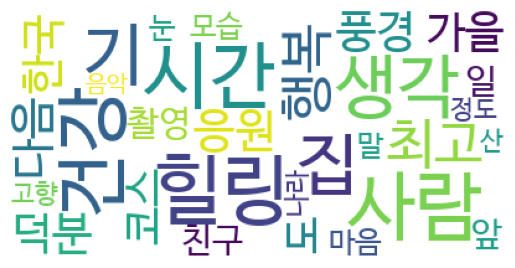

In [70]:
text = ' '.join(map(str, df_sheets))
text_split = text.split()
text_split_count = Counter(text_split)
top_30 = pd.Series(text_split_count).sort_values(ascending=False)[:30]
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(top_30)

import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [ ]:
# df_youtube_comments.to_csv("youtube_comments_concat.csv", index=False)

In [ ]:
# df_youtube_comments_unique.to_csv("youtube_comments_unique.csv", index=False)